# Computational Methods in Economics

## Problem Set 4 - Function Approximation 

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-12-08 16:34:27.191577


### Preliminaries

#### Import Modules

In [7]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import funapprox_cme as fa

# import sys
from importlib import reload

In [8]:
reload(fa)

<module 'funapprox_cme' from 'C:\\Users\\schmitt\\Dropbox\\TeachingCME\\Lecture6_FunApprox\\funapprox_cme.py'>

## Question 1 (A)



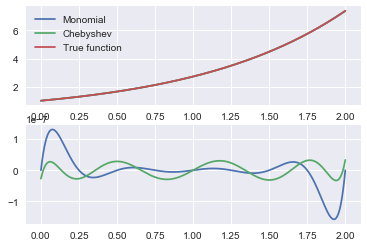

In [9]:
def fun(x, alpha = 1):
    """
    Exponential function
    """
    y = np.exp(alpha * x)

    return y

m = 9
g_min, g_max = 0, 2

x_grid = np.linspace(g_min, g_max, m)
y_grid = fun(x_grid) 

x = np.linspace(g_min, g_max, 1001)
y = fun(x)

a_mono = np.polynomial.polynomial.polyfit(x_grid, y_grid, m-1)
y_mono = np.polynomial.polynomial.polyval(x, a_mono)

a_cheb = fa.get_coef( fun(fa.chebgrid(g_min, g_max, m)) , m-1)
y_cheb = np.polynomial.chebyshev.chebval( fa.chebconvert(x, g_min, g_max), a_cheb)

fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y_mono, label = 'Monomial')
ax[0].plot(x, y_cheb, label = 'Chebyshev')
ax[0].plot(x, y, label = 'True function')
ax[0].legend()
ax[1].plot(x, y - y_mono)
ax[1].plot(x, y - y_cheb)

## Question 2 (N)

This question illustrates why we should use Chebyshev nodes instead of equally spaced (equidistant) nodes, and Chebyshev polynomials instead of monomials for the basis functions. We use Runge's function as an example.

In [ ]:
def fun(x, alpha = 1):
    """
    Runge's Function
    """
    return (1 + alpha * x**2)**(-1)

## min and max for approximation grid
g_min, g_max = -5, 5
## number of grid points
m = 11
## equidistant grid
g_e = np.linspace(g_min, g_max, m)
y_e = fun(g_e)
## Chebyshev grid
g_c = chebgrid(g_min, g_max, m)
y_c = fun(g_c)
## define dictionary for results
a = {}

## Exercise 1: use monomials
a['p_e'] = np.polynomial.polynomial.polyfit(g_e, y_e, m - 1) 
a['p_c'] = np.polynomial.polynomial.polyfit(g_c, y_c, m - 1) 

## Exercise 1: use monomials
a['c_e'] = np.polynomial.chebyshev.chebfit(convert(g_e, g_min, g_max), y_e, m - 1) 
a['c_c'] = np.polynomial.chebyshev.chebfit(convert(g_c, g_min, g_max), y_c, m - 1) 

## interpolate over long grid
N = 1001
g_long = np.linspace(g_min, g_max, N)
y_long = fun(g_long)

## plot approximation errors
fig, ax = plt.subplots()
ax.plot(g_long, y_long - np.polynomial.polynomial.polyval(g_long, a['p_e']), 'b', linestyle = '--')
ax.plot(g_long, y_long - np.polynomial.polynomial.polyval(g_long, a['p_c']), 'b' )
ax.plot(g_long, y_long - np.polynomial.chebyshev.chebval(convert(g_long, g_min, g_max), a['c_e']), 'g', linestyle = '--' )
ax.plot(g_long, y_long - np.polynomial.chebyshev.chebval(convert(g_long, g_min, g_max), a['c_c']), 'g' )

## Question 3 (A)

## Question 4 (N)